In [ ]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

# Fit model to points
model.fit(points)   # points su array([ [x,y]] )

In [ ]:
# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


In [ ]:
# Import pyplot
import matplotlib.pyplot as plt
#%inline

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.show()

In [ ]:
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker = "D", s = 50)  # D = diamonds, s = size of markers 
plt.show()


In [ ]:
# Ciel: minimalizovat spread (velkost) clustrov --> stvorce distancii od centroidov 
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(samples)
print(model.inertia_)   # sposob ako sa dostaneme k hodnote

# Laktovy graf: zobereme #pocet clustrov, ktory ma malu inertiu avsak aby sme nemali vela clustrov tak zobereme tu kde sa to ustali
    
    
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#https://scikit-learn.org/stable/modules/clustering.html



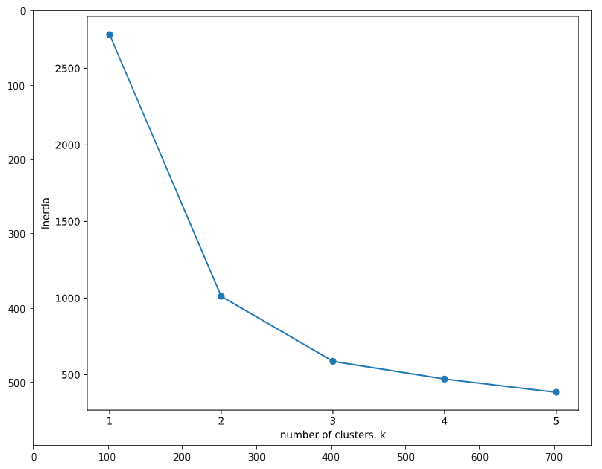

In [31]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline  
img = mpimg.imread("Desktop\\MLT in PY 4 NM\\pic.png")
plt.figure(figsize = (50,8))
plt.imshow(img) 
#plt.show()  # display it

V tomto pripade by asi postacili 3 clustre

### Kontrola "confusion matrixu"

In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df["labels"], df["varieties"])

# Display ct
print(ct)

# Transforming features 

Aby sme mali spravny clustering, je potrebna normalizacia dat. Premenne s vyssou volatilitou budu najviac ovplyvnovat model a aj clustre sa budu viac menej prisposobovat takymto premennym

Rieši sa to StandardScaler zo scikit-learnu

<b> StandarScaler </b>  má fit/transform 

<b> KMeans </b>  má fit/predict 

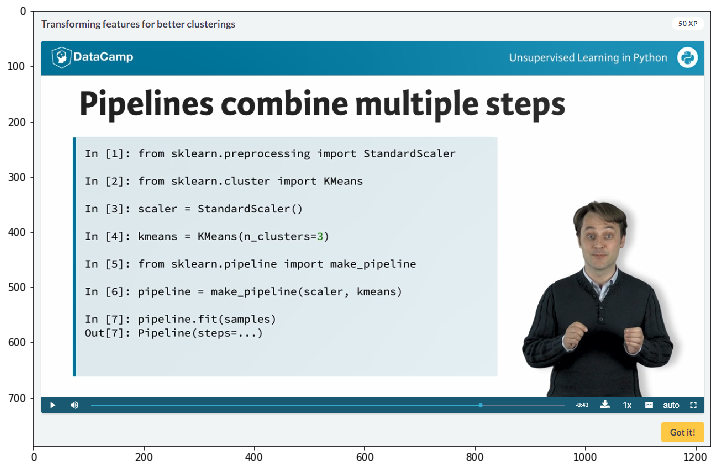

In [30]:
img = mpimg.imread("Desktop\\MLT in PY 4 NM\\pipelinesteps.png")
plt.figure(figsize = (50,8))
plt.imshow(img) 

In [ ]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters = 4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [ ]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({"labels": labels, "species": species})

# Create crosstab: ct
ct = pd.crosstab(df["labels"], df["species"])

# Display ct
print(ct)

### Normalizer

In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer
# Import pandas
import pandas as pd

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters = 10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(by = "labels"))

## Hierarchický clustering

In [ ]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method = "complete")
mergings

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels = varieties,
           leaf_rotation = 90,
           leaf_font_size = 6,
)
plt.show()

In chapter 1, you used k-means clustering to cluster companies according to their stock price movements.
Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements, 
where the rows correspond to companies, and a list of the company names companies. 
SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

linkage and dendrogram have already been imported from sklearn.cluster.hierarchy, and PyPlot has been imported as plt.